In [1]:
import sys
import os

# Add the parent directory of "tests" to sys.path
sys.path.append(os.path.abspath("/Users/workspace/Software/Layered_Tank_Simulation/CherenkovSim/"))

In [2]:
from cherenkov_sim.particle import Particle
from cherenkov_sim.muon import Muon
from cherenkov_sim.material import Material
from cherenkov_sim.tracker import ParticleTracker

import numpy as np
from astropy import units as u

In [3]:
e = 1 * u.GeV
muon = Muon(energy = e)

In [11]:
ice = Material(
    name = 'Ice',
    Z_A = 0.55509 * u.mol / u.g,
    rho = 0.9180 * u.g / u.cm**3,
    I = 79.7 * u.eV, 
    n = 1.309,
    X0 = 39.31 * u.cm, 
    delta_file = '/Users/workspace/Software/PHYS-F-420/lesson2/delta_elec.txt'
)

water = Material(
    name = 'water',
    Z_A = 0.55509 * u.mol / u.g,
    rho = 1 * u.g / u.cm**3,
    I = 79.7 * u.eV,
    n = 1.333,
    X0 = 36.08 * u.cm, 
    delta_file = '/Users/workspace/Software/PHYS-F-420/lesson2/delta_elec.txt'
)

In [12]:
# Extract starting position randomly from a circle corresponding to the top of the tank
N_event = 10 # Choose number of particles 

# Gen. surface radius 
R_gen = 180 * u.cm 
 
def rnd_tank_start(R_gen, N_event): 
    r = R_gen * np.sqrt(np.random.uniform(0,1,size=N_event))
    alpha = np.random.uniform(0,2*np.pi, size=N_event) 
    z_value = 140 
    x0 = r * np.cos(alpha)   
    y0 = r * np.sin(alpha)  
    z0 = np.full(N_event,z_value) * u.cm
    return x0, y0, z0   


def rnd_direction(N_event):
    phi = np.random.uniform(0,2*np.pi, size=N_event)

    theta_0 = 0 * u.deg 
    theta_1 = 30 * u.deg 
    cos_theta_squared = np.random.uniform(np.cos(theta_1.to(u.rad))**2,np.cos(theta_0.to(u.rad))**2, size=N_event)
    cos_theta = np.sqrt(cos_theta_squared)
    theta = np.arccos(cos_theta) 
    return theta * u.rad, phi * u.rad

In [13]:
# Track muons inside the tank, considering energy loss and Cherenkov produciton 

muon_theta, muon_phi = rnd_direction(N_event)
x0,y0,z0 = rnd_tank_start(R_gen, N_event)  

initial_position = np.array([x0[0].value,y0[0].value,z0[0].value]) * u.cm
theta = muon_theta[0]

In [14]:
# Create the Tracker
tracker = ParticleTracker(muon, ice, step_size= - 1.0 * u.cm,
                      position=initial_position, 
                      zenith=muon_theta[0], 
                      azimuth=muon_phi[0])


In [15]:
initial_position

<Quantity [-157.57291122,   17.60360566,  140.        ] cm>

In [16]:
tracker.material.n

1.309

In [17]:
tracker.cherenkov_yield(300 , 600 )

<Quantity 3.13245027e-05>

In [18]:
tracker.propagate(lambda1 = 300 * u.nm, lambda2 = 600 * u.nm)

Starting muon tracking at position [-157.57291122   17.60360566  140.        ] cm with energy 1.00 GeV
Tracking complete. Particle stopped.


In [19]:
tracker.cherenkov_photons

[<Quantity [-149.0092743 ,   14.77192174,  115.08004067] cm>,
 <Quantity [-148.91145217,   14.73957551,  114.79538081] cm>,
 <Quantity [-148.98174972,   14.76282036,  114.99994486] cm>,
 <Quantity [-149.08901039,   14.79828758,  115.31207061] cm>,
 <Quantity [-149.02405199,   14.77680819,  115.12304336] cm>,
 <Quantity [-149.06538668,   14.79047607,  115.24332622] cm>,
 <Quantity [-149.16273576,   14.82266588,  115.52660948] cm>,
 <Quantity [-149.09255471,   14.79945955,  115.32238448] cm>,
 <Quantity [-148.87503271,   14.72753292,  114.68940113] cm>,
 <Quantity [-148.9983683 ,   14.76831553,  115.04830449] cm>,
 <Quantity [-149.07667973,   14.79421027,  115.27618869] cm>,
 <Quantity [-149.12397402,   14.80984878,  115.41381383] cm>,
 <Quantity [-149.14057579,   14.81533838,  115.46212457] cm>,
 <Quantity [-149.07836347,   14.79476702,  115.28108833] cm>,
 <Quantity [-148.93212232,   14.74641038,  114.85553042] cm>,
 <Quantity [-149.00044601,   14.76900255,  115.05435056] cm>,
 <Quanti

In [20]:
x_plot = [ coord.value[0] for coord in tracker.track]
y_plot = [ coord.value[1] for coord in tracker.track]
z_plot = [ coord.value[2] for coord in tracker.track]

(-200.0, 200.0)

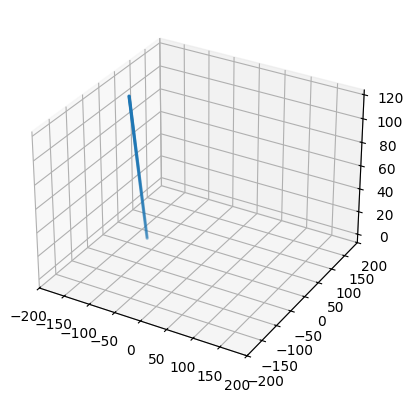

In [21]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x_plot,y_plot,z_plot, marker='o', s=2)
plt.xlim(-200,200)
plt.ylim(-200,200)
